In [ ]:
!pip uninstall scikit-learn

In [16]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 40.5 MB/s eta 0:00:00


## B1: Thu thập dữ liệu

###Package Requirements

In [17]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
from sklearn.datasets import load_boston
boston_data = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [20]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
print("Keys: ", boston_data.keys())

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [22]:
print("Shape: ", boston_data.data.shape)

Shape:  (506, 13)


In [23]:
print("Feature Names: ", boston_data.feature_names)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Tiền xử lí dữ liệu

## Extract Data
Pass the data into a Pandas dataframe

In [24]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Relabel the columns using the Boston dataset feature names

In [25]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Add home prices to the Pandas dataframe

In [26]:
boston_data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [27]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (506,)


In [28]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
bos_pd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

### Exploratory Data Analysis

Check Missing Values

In [30]:
bos_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [31]:
bos_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [32]:
bos_pd.describe().transpose()
# Hàm describe() tính : count, mean, std ,min, max,..
#transpose() chuyển đổi dataframe từ dọc thành ngang và ngược lại

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Distribution of the target variable </br>
Phân phối biến mục tiêu

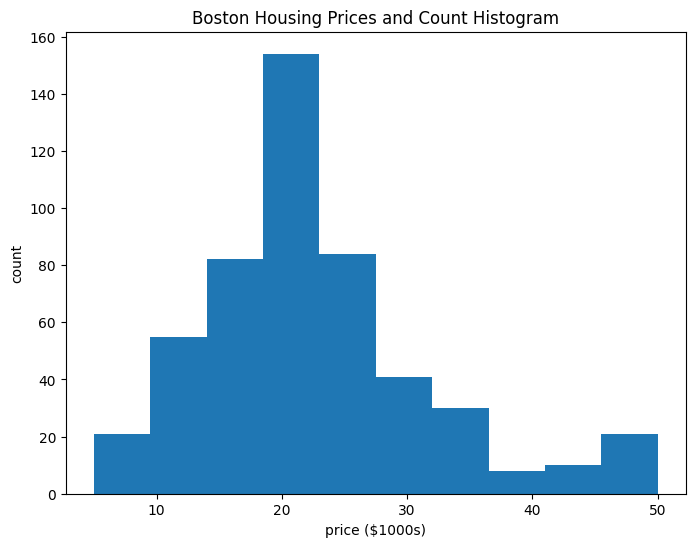

In [33]:
plt.figure(figsize=(8, 6))# tạo 1 figure có kích thước 8x6 inches
plt.hist(bos_pd['PRICE'])# tạo biểu đồ histogram vẽ cho cột price
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

<ipython-input-34-1eb166cbf4b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos_pd['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

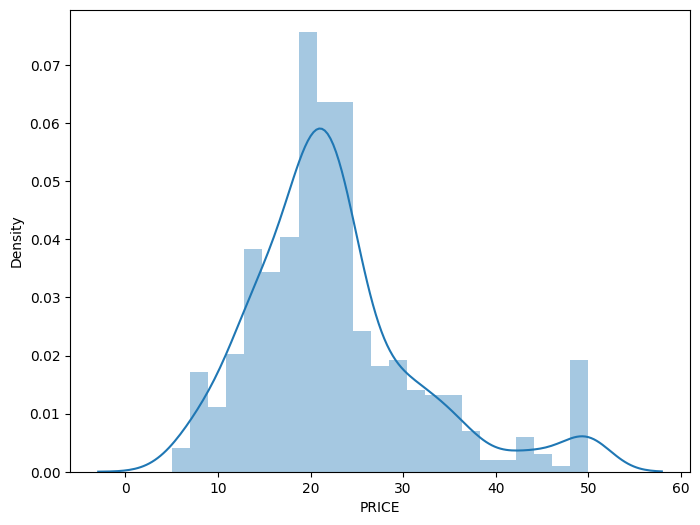

In [34]:
plt.figure(figsize=(8, 6))
sns.distplot(bos_pd['PRICE'])# vẽ biểu đồ phân bố đường cong của PRICE

Heatmap: Two-Dimensional Graphical Representation

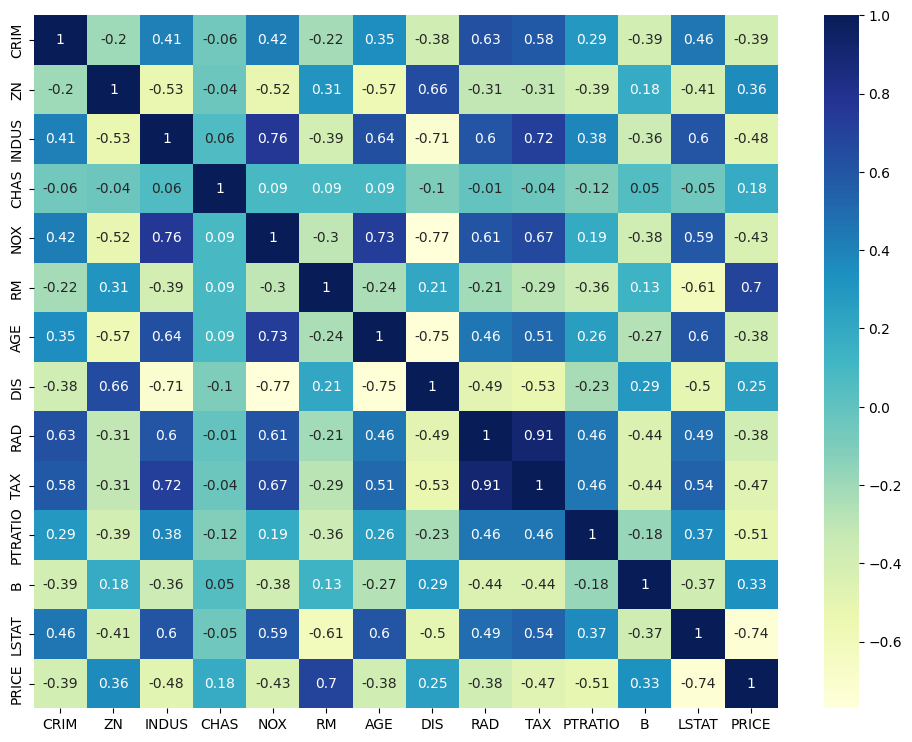

In [42]:
plt.figure(figsize=(12, 9));
correlation_matrix = bos_pd.corr().round(2);
# tính ma trận tương quan của cali_pd làm tròn tới 2 chữ số thập phân
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);
# vẽ bản đồ nhiệt heatmap tương quan bằng màu sắc
# cmap="YlGnBu" đặt màu sắc từ dải màu  "YlGnBu"
#annot = True: cho phép hiển thị giá trị trên từng ô

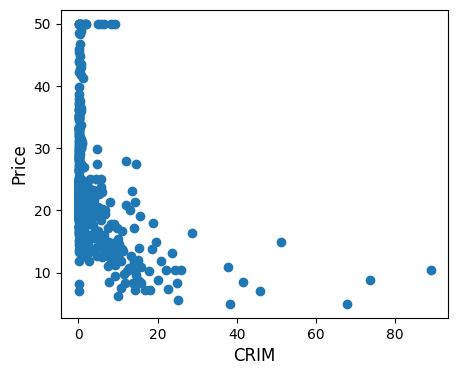

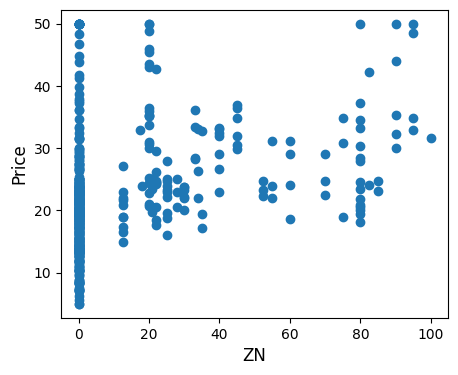

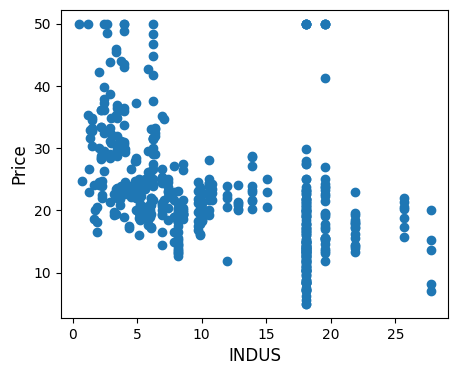

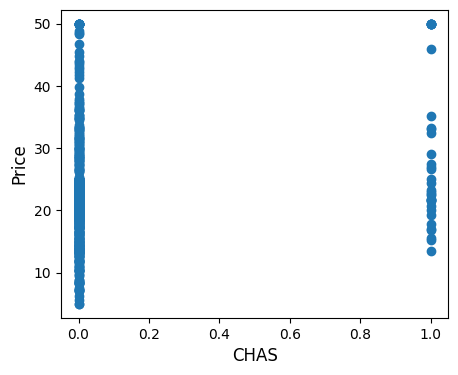

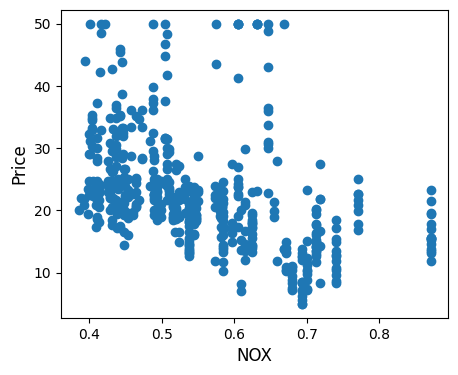

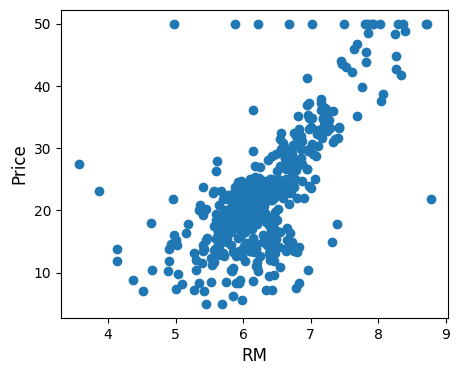

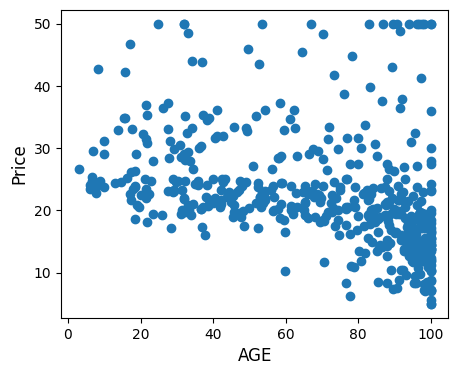

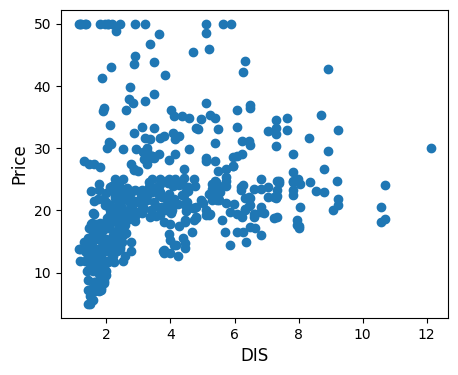

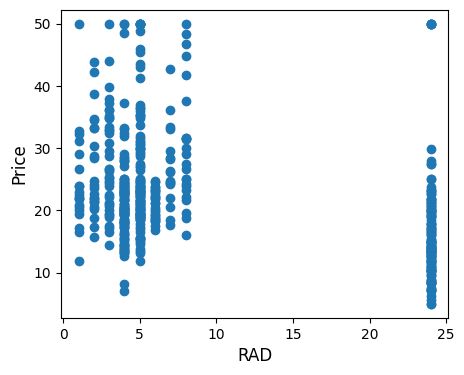

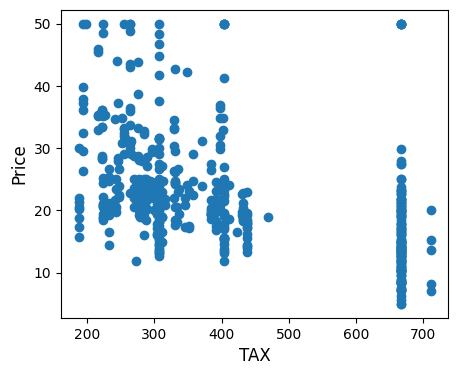

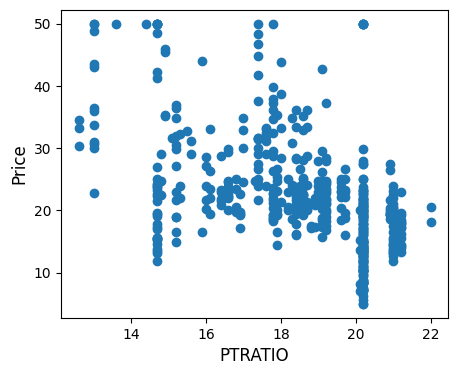

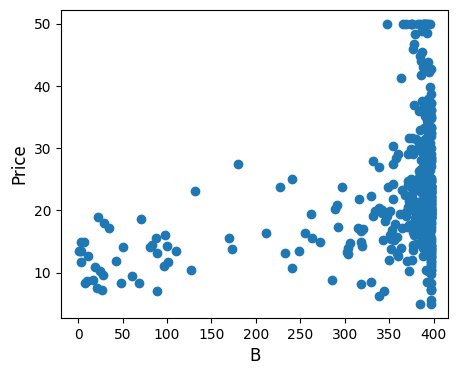

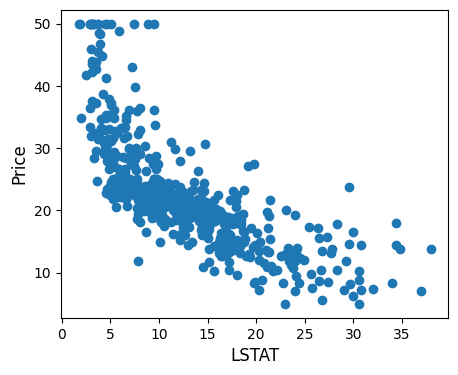

In [35]:
for feature_name in boston_data.feature_names:
    plt.figure(figsize=(5, 4))
    plt.scatter(bos_pd[feature_name], bos_pd['PRICE'])
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
plt.show()

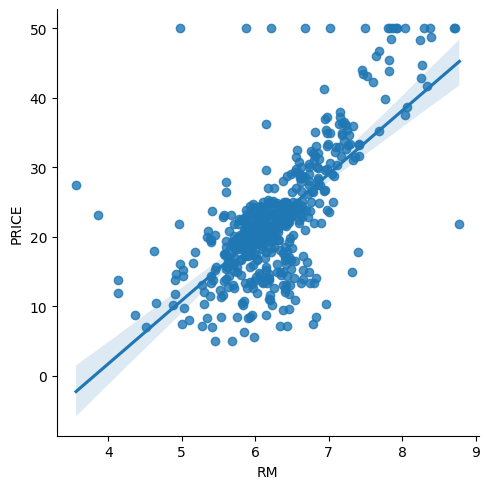

In [36]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd);
#lmplot vẽ đồ thị scatter plot với đường hồi quy tương ứng
# lmplot kết hợp tính năng của regplot và FacetGrid

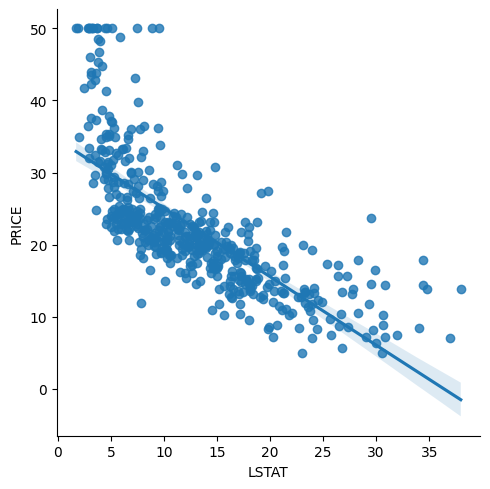

In [44]:
sns.lmplot(x = 'LSTAT', y= 'PRICE', data = bos_pd)

In [43]:
X_rooms = bos_pd.RM
y_price = bos_pd.PRICE

# chuyển đổi về mảng 2 chiều có số cột là 1 số hàng không xác định
X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


Splitting the data into training and testing sets

In [38]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)
# câu lệnh trên chia X_rooms, y_price thành 4 tập dữ liệu
#Test theo tỉ lệ chỉ định
# test_size =0.2 : 20% dữ liệu sẽ được chọn ngẫu nhiên để tạo thành tập test
# 80% dữ liệu sẽ là tập train


print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


#B3:Huấn luyện mô hình

Training and testing the model

In [39]:
reg_1 = LinearRegression()
# tạo một mô hình hồi quy tính reg_1 bằng phương thức LinearRegression

# sử dụng fit để huấn luyện mô hình với dữ liệu X_train_1, Y_train_1
reg_1.fit(X_train_1, Y_train_1)

# Sử dụng mô hình  dự đoán giá trị đầu ra y_train_predict_1 từ đầu vào X_train_1
y_train_predict_1 = reg_1.predict(X_train_1)


# đánh giá mô hình, tính toán độ đo RMSE
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))

#hệ số r2 cho biết mức độ mô hình
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [45]:
X_lstat = bos_pd.LSTAT
Y_price_2 = bos_pd.PRICE


X_lstat = np.array(X_lstat).reshape(-1,1)
Y_price_2 = np.array(Y_price_2).reshape(-1,1)

print(X_lstat.shape)
print(Y_price_2.shape)

(506, 1)
(506, 1)


In [49]:
X_train_2, X_test_2, Y_train_2, Y_test_2 =\
  train_test_split(X_lstat, Y_price_2 , test_size = 0.2 , random_state=5)


print(X_train_2.shape)
print(Y_train_2.shape)
print(X_test_2.shape)
print(Y_test_2.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [51]:
reg_2 = LinearRegression()

reg_2.fit(X_train_2, Y_train_2)

Y_train_predict_2 = reg_2.predict(X_train_2)

rmse_2 = (np.sqrt(metrics.mean_squared_error(Y_train_2, Y_train_predict_2)))

r2_2 = round(reg_2.score(X_train_2, Y_train_2),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_2))
print('R2 score is {}'.format(r2_2))
print("\n")




The model performance for training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.55




#B4: Đánh giá mô hình

Model Evaluation for Test Set

In [40]:
y_pred_1 = reg_1.predict(X_test_1)

# tính toán độ đo rmse so sánh y_pred_1 và Y_test_1
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))

# tính toán hệ số xác định r2 bằng phương thức score()
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69


In [46]:
print(X_test_1.shape)
print(y_pred_1.shape)

(102, 1)
(102, 1)


# Tính RMSE root mean square error

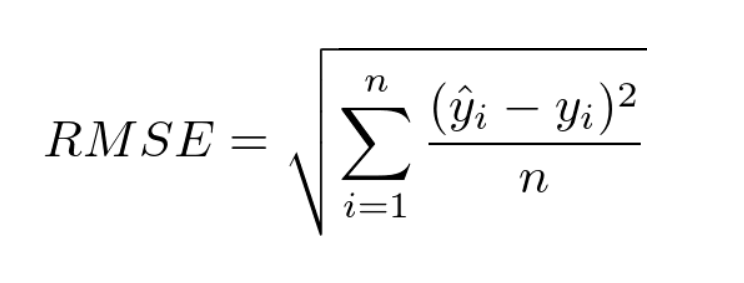

In [47]:
import numpy as np

def tinh_rmse(actual, predicted):
  if len(actual) != len(predicted):
    raise ValueError("Chieu dai actual va predicted khong khop")

  #Tinh square errors
  sq_errors = (actual - predicted) ** 2
  # Tinh mean square errors
  mse = np.mean(sq_errors)
  # Tinh RMSE
  rmse = np.sqrt(mse)

  return rmse


In [48]:
rmse_1 = tinh_rmse(Y_test_1, y_pred_1)

rmse_1

4.895963186952216

45-Degree Plot

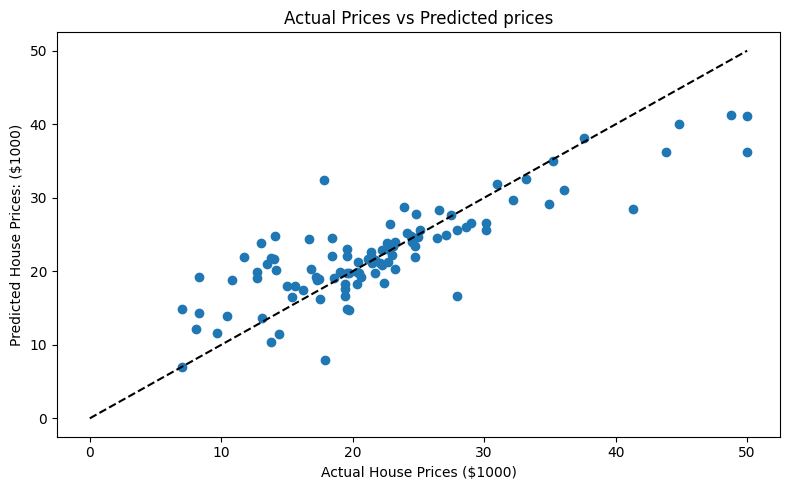

In [41]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();